In [88]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
%matplotlib ipympl
%matplotlib inline
# %matplotlib widget

In [89]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

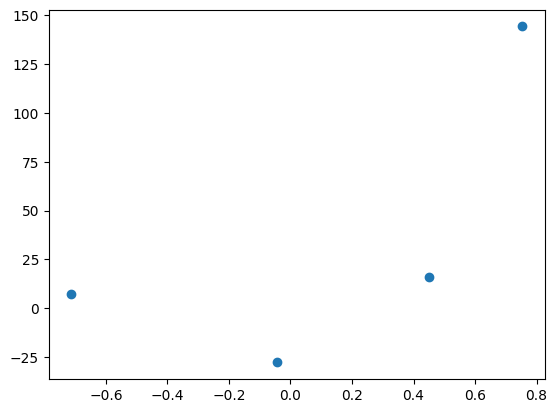

In [90]:
plt.scatter(x,y)
plt.show()

In [91]:
# lets apply OLS to get slope and intercept value
from sklearn.linear_model import LinearRegression

In [92]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [93]:
reg.coef_

array([78.35063668])

In [94]:
reg.intercept_

26.15963284313262

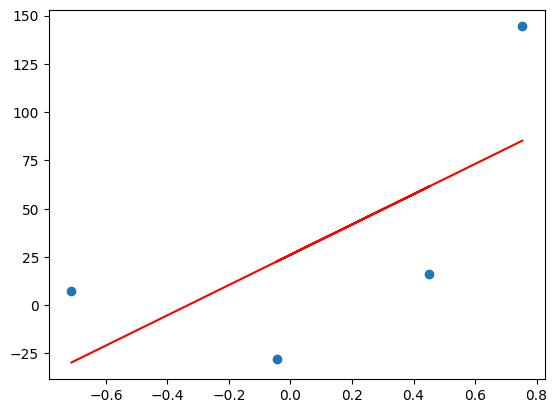

In [95]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),c='red')

In [96]:
# lets apply Gradient Descent assuming slope is constant m=78.35
# and lets assume starting value for intercept b=0
y_pred=((78.35*x)+0).reshape(4)

In [97]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

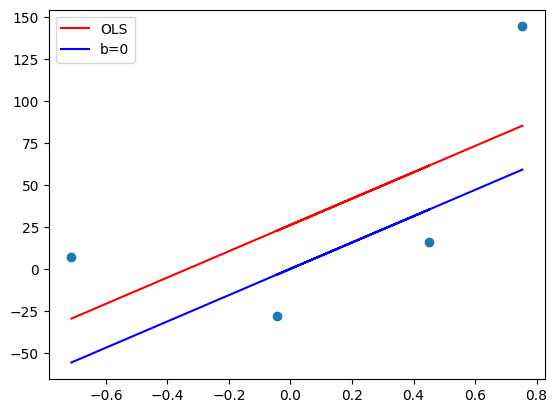

In [98]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),c='red',label='OLS')
plt.plot(x,y_pred,c='blue',label='b=0')
plt.legend()
plt.show()

# -2 ∑ (y_i-m*x_i-b) here we know all values  
# we are changing b value to see the changes

In [99]:
m=78.35
b=0
loss_slope=-2*np.sum(y-m*x.ravel()-b)
loss_slope

-209.27763408209216

# Lets take learning rate 0.1

In [100]:
learning_r=0.1
step_size=loss_slope*learning_r
step_size

-20.927763408209216

In [101]:
# calculate new intercept
b=b-step_size
b

20.927763408209216

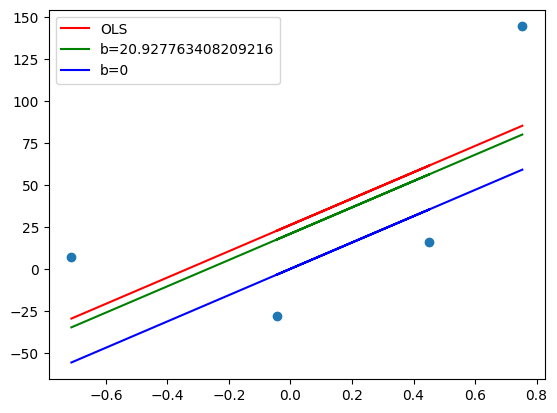

In [102]:
y_pred1=((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),c='red',label='OLS')
plt.plot(x,y_pred1,c='green',label=f'b={b}')
plt.plot(x,y_pred,c='blue',label='b=0')
plt.legend()
plt.show()

In [103]:
# iteration 2
loss_slope=-2*np.sum(y-m*x.ravel()-b)
loss_slope

-41.85552681641843

In [104]:
step_size=loss_slope*learning_r
step_size

-4.185552681641844

In [105]:
b=b-step_size
b

25.11331608985106

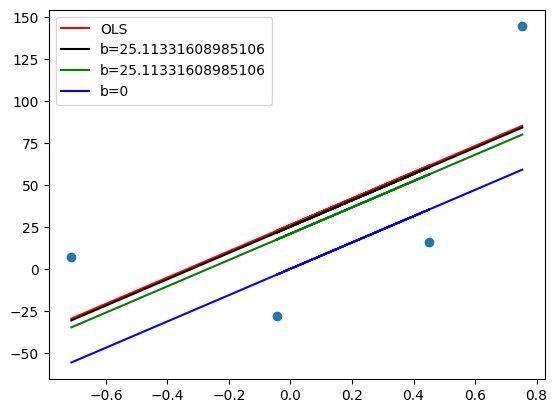

In [106]:
y_pred2=((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),c='red',label='OLS')
plt.plot(x,y_pred2,c='black',label=f'b={b}')
plt.plot(x,y_pred1,c='green',label=f'b={b}')
plt.plot(x,y_pred,c='blue',label='b=0')
plt.legend()
plt.show()

In [107]:
# iteration 3
loss_slope=-2*np.sum(y-m*x.ravel()-b)
loss_slope

-8.371105363283675

In [108]:
step_size=loss_slope*learning_r
step_size

-0.8371105363283675

In [109]:
b=b-step_size
b

25.95042662617943

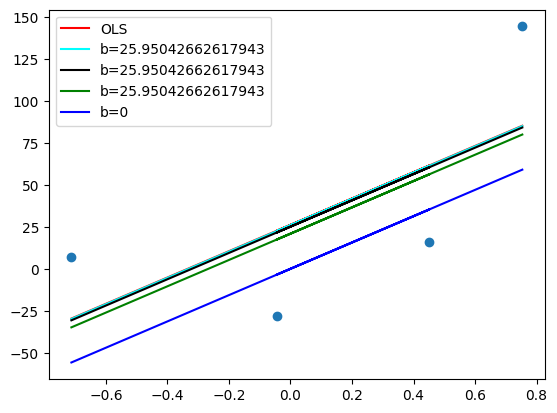

In [110]:
y_pred3=((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),c='red',label='OLS')
plt.plot(x,y_pred3,c='cyan',label=f'b={b}')
plt.plot(x,y_pred2,c='black',label=f'b={b}')
plt.plot(x,y_pred1,c='green',label=f'b={b}')
plt.plot(x,y_pred,c='blue',label='b=0')
plt.legend()
plt.show()

# Gradient descent function

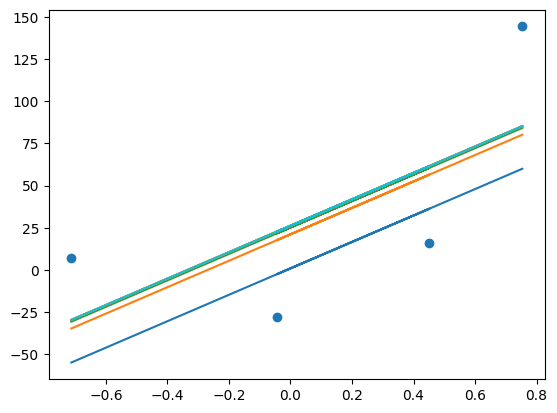

In [111]:
b=-100
m=78.35
learn_rate=0.1
epochs=10

for i in range(epochs):
    loss_slope=-2*np.sum(y-m*x.ravel()-b)
    b=b-loss_slope*learn_rate
    y_pred=m*x+b
    plt.plot(x,y_pred)

plt.scatter(x,y)

# Gradient Descent animation both m and b  
## (ANIMATION IS NOT WORKING RIGHT NOW)

In [112]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

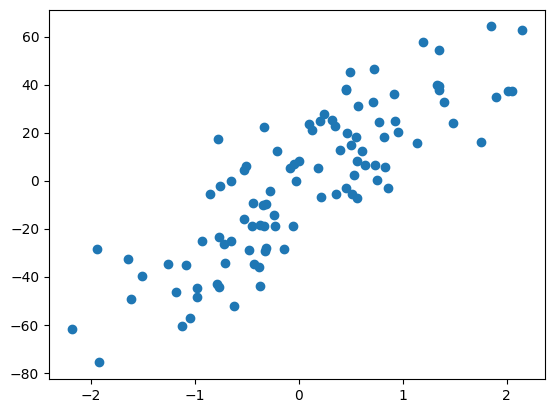

In [113]:
plt.scatter(x,y)
plt.show()

In [114]:
b=-120
m=100
lr=0.001
all_b=[]
all_m=[]
all_cost=[]
epochs=30

for i in range(epochs):
    slope_b=0
    slope_m=0
    cost=0
    for j in range(x.shape[0]):
        slope_b=slope_b-2*(y[j]-(m*x[j])-b)
        slope_m=slope_m-2*(y[j]-(m*x[j])-b)*x[j]
        cost=cost+(y[j]-m*x[j]-b)**2
        b=b-(lr*slope_b)
        m=m-(lr*slope_m)
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)

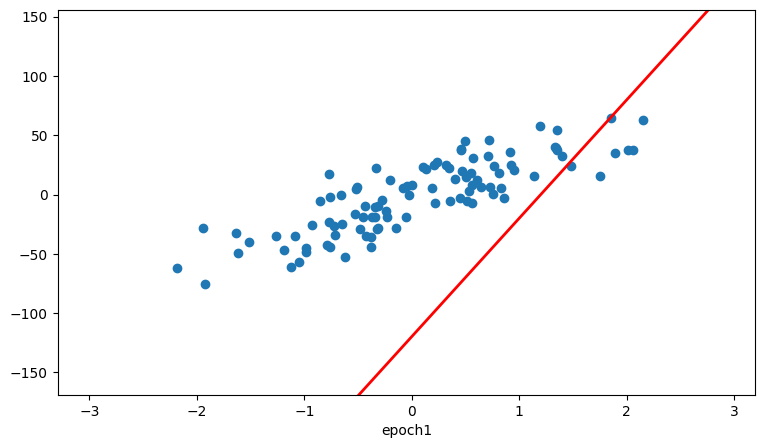

In [119]:
fig,ax=plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i=np.arange(-3,3,0.1)
y_i=x_i*(-27)-150
ax.scatter(x,y)
line,=ax.plot(x_i,x_i*50-4,'r-',linewidth=2)

def update(i):
    label='epoch{0}'.format(i+1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line,ax

anim=FuncAnimation(fig,update,repeat=True,frames=epochs,interval=500)
# plt.show()